<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px">

# Project 2: Analyzing IMDb Data

_Author: Kevin Markham (DC)_

---

For project two, you will complete a series of exercises exploring movie rating data from IMDb.

For these exercises, you will be conducting basic exploratory data analysis on IMDB's movie data, looking to answer such questions as:

What is the average rating per genre?
How many different actors are in a movie?

This process will help you practice your data analysis skills while becoming comfortable with Pandas.

## Basic level

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('fivethirtyeight')

%matplotlib inline

#### Read in 'imdb_1000.csv' and store it in a DataFrame named movies.

In [2]:
movies = pd.read_csv('./data/imdb_1000.csv')

movies.head()

,star_rating,title,content_rating,genre,duration,actors_list
0,9.3,The Shawshank Redemption,R,Crime,142,"[u'Tim Robbins', u'Morgan Freeman', u'Bob Gunt..."
1,9.2,The Godfather,R,Crime,175,"[u'Marlon Brando', u'Al Pacino', u'James Caan']"
2,9.1,The Godfather: Part II,R,Crime,200,"[u'Al Pacino', u'Robert De Niro', u'Robert Duv..."
3,9.0,The Dark Knight,PG-13,Action,152,"[u'Christian Bale', u'Heath Ledger', u'Aaron E..."
4,8.9,Pulp Fiction,R,Crime,154,"[u'John Travolta', u'Uma Thurman', u'Samuel L...."


#### Check the number of rows and columns.

In [3]:
# Answer:
movies.shape

(979, 6)

#### Check the data type of each column.

In [4]:
# Answer:
movies.dtypes

star_rating       float64
title              object
content_rating     object
genre              object
duration            int64
actors_list        object
dtype: object

#### Calculate the average movie duration.

In [5]:
# Answer:
movies.loc[:, 'duration'].mean()#I did this first

120.97957099080695

In [4]:
movies.duration.mean()# and then remembered I could use dot notation

120.97957099080695

In [61]:
movies['duration'].mean() #or even this

120.97957099080695

#### Sort the DataFrame by duration to find the shortest and longest movies.

In [6]:
# Answer:#Freaks is the shortest at 64 minutes. Hamlet is the longest at 242 minutes.
duration = movies.sort_values(by=['duration'])
print(duration.head(1))
print(duration.tail(1))

     star_rating   title content_rating  genre  duration  \
389          8.0  Freaks        UNRATED  Drama        64   

                                           actors_list  
389  [u'Wallace Ford', u'Leila Hyams', u'Olga Bacla...  
     star_rating   title content_rating  genre  duration  \
476          7.8  Hamlet          PG-13  Drama       242   

                                           actors_list  
476  [u'Kenneth Branagh', u'Julie Christie', u'Dere...  


#### Create a histogram of duration, choosing an "appropriate" number of bins.

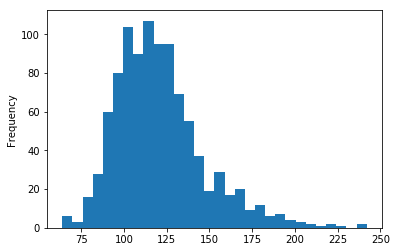

In [8]:
# Answer:#I tried this three ways, they all return the same thing
axes = movies.loc[:, 'duration'].plot(kind='hist', bins=30)
                              

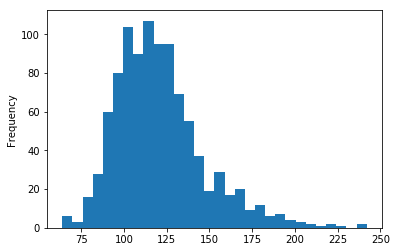

In [10]:
axes = movies.duration.plot(kind='hist', bins=30)

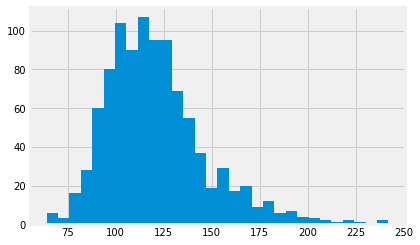

In [175]:
axes = movies.duration.hist(bins=30)

#### Use a box plot to display that same data.

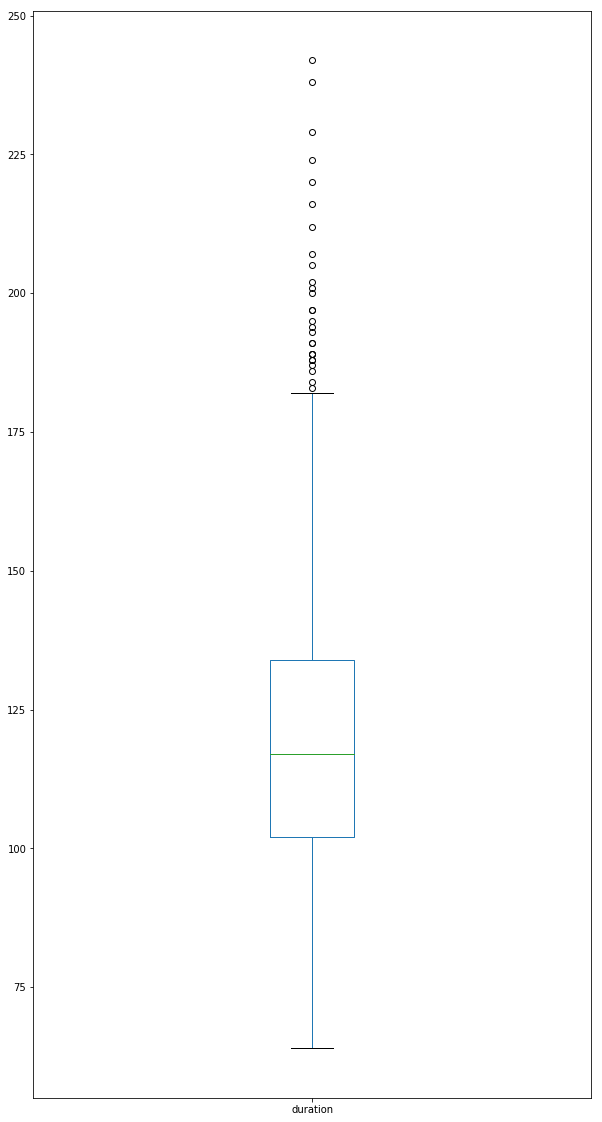

In [11]:
# Answer:
axes = movies.loc[:, 'duration'].plot(kind='box', figsize=(10,20))#i used this figure size because 
#it was too smashed to read otherwise, and bigger than this is too big for the note book.

## Intermediate level

#### Count how many movies have each of the content ratings.

In [12]:
# Answer:
movies.content_rating.value_counts()

R            460
PG-13        189
PG           123
NOT RATED     65
APPROVED      47
UNRATED       38
G             32
PASSED         7
NC-17          7
X              4
GP             3
TV-MA          1
Name: content_rating, dtype: int64

#### Use a visualization to display that same data, including a title and x and y labels.

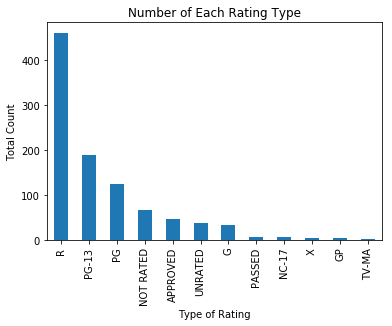

In [13]:
# Answer:
ax = movies.content_rating.value_counts().plot(kind='bar')
plt.ylabel('Total Count')
plt.xlabel('Type of Rating')
plt.title('Number of Each Rating Type');


#### Convert the following content ratings to "UNRATED": NOT RATED, APPROVED, PASSED, GP.

In [179]:

movies.content_rating.value_counts()

R          460
PG-13      190
UNRATED    160
PG         125
G           32
NC-17       12
Name: content_rating, dtype: int64

In [3]:
# Answer:#I tried to make a dictionary and rename the values that way, but I kept getting errors 
#I couldn't figure out so I looked up other methods and this seemed easiest. I used inplace=True instead of
#movies = movies.replace

movies.replace(to_replace=['NOT RATED','APPROVED','PASSED','GP'], value=['UNRATED', 'UNRATED', 'UNRATED', 'UNRATED'], inplace=True)  


In [4]:
movies.content_rating.value_counts()#running this shows me it worked

R          460
PG-13      189
UNRATED    160
PG         123
G           32
NC-17        7
X            4
TV-MA        1
Name: content_rating, dtype: int64

#### Convert the following content ratings to "NC-17": X, TV-MA.

In [5]:
# Answer:#I used the same method as above and ran the value_counts to check
movies.replace(to_replace=['X', 'TV-MA'], value=['NC-17','NC-17'], inplace=True)
movies.content_rating.value_counts()

R          460
PG-13      189
UNRATED    160
PG         123
G           32
NC-17       12
Name: content_rating, dtype: int64

#### Count the number of missing values in each column.

In [6]:
# Answer:
movies.loc[:,:].isna().sum()

star_rating       0
title             0
content_rating    3
genre             0
duration          0
actors_list       0
dtype: int64

#### If there are missing values: examine them, then fill them in with "reasonable" values.

In [7]:
movies.loc[movies.loc[:, 'content_rating'].isna(),:]

,star_rating,title,content_rating,genre,duration,actors_list
187,8.2,Butch Cassidy and the Sundance Kid,NaN,Biography,110,"[u'Paul Newman', u'Robert Redford', u'Katharin..."
649,7.7,Where Eagles Dare,NaN,Action,158,"[u'Richard Burton', u'Clint Eastwood', u'Mary ..."
936,7.4,True Grit,NaN,Adventure,128,"[u'John Wayne', u'Kim Darby', u'Glen Campbell']"


In [8]:
# Answer:
movies.loc[936: "content_rating"].fillna(value='PG-13', inplace=True)
movies.loc[187: "content_rating"].fillna(value='PG', inplace=True)
movies.loc[649: "content_rating"].fillna(value='PG', inplace=True)

#this one was a little confusing. I had to place row 936 first because with it in the last position instead
#of the first, it filled with PG and not PG-13, but the same thing has not happened for the others. They do not now
#say PG-13, they still say PG. I wasn't sure if it had to do with Jupyter lab, or the warning below.


C:\Users\lacey\Anaconda3\lib\site-packages\pandas\core\frame.py:4034: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  downcast=downcast, **kwargs)


In [9]:
movies.loc[movies.loc[:, 'content_rating'].isna(),:]#this tells me there are no more null values

,star_rating,title,content_rating,genre,duration,actors_list


In [13]:
movies.loc[936:'content_rating',].head(1)

,star_rating,title,content_rating,genre,duration,actors_list
936,7.4,True Grit,PG-13,Adventure,128,"[u'John Wayne', u'Kim Darby', u'Glen Campbell']"


In [14]:
movies.loc[187:'content_rating',].head(1)

,star_rating,title,content_rating,genre,duration,actors_list
187,8.2,Butch Cassidy and the Sundance Kid,PG,Biography,110,"[u'Paul Newman', u'Robert Redford', u'Katharin..."


In [12]:
movies.loc[649:'content_rating',].head(1)

,star_rating,title,content_rating,genre,duration,actors_list
649,7.7,Where Eagles Dare,PG,Action,158,"[u'Richard Burton', u'Clint Eastwood', u'Mary ..."


#### Calculate the average star rating for movies 2 hours or longer, and compare that with the average star rating for movies shorter than 2 hours.

In [60]:
# Answer:
long_movies = movies[movies.duration >= 120]
short_movies = movies[movies.duration < 120]
print(long_movies.star_rating.mean(),':', 'Average Star Rating for movies 2 hours or longer')
print(short_movies.star_rating.mean(),':', 'Average Star Rating for movies less than 2 hours long')
print(long_movies.star_rating.mean() - short_movies.star_rating.mean())
#there doesn't seem to be a meaningful impact on the average star rating if a movie is less than 2 hours or if it's 2
#hours or more.

7.948898678414082 : Average Star Rating for movies 2 hours or longer
7.838666666666657 : Average Star Rating for movies less than 2 hours long
0.11023201174742514


#### Use a visualization to detect whether there is a relationship between duration and star rating.

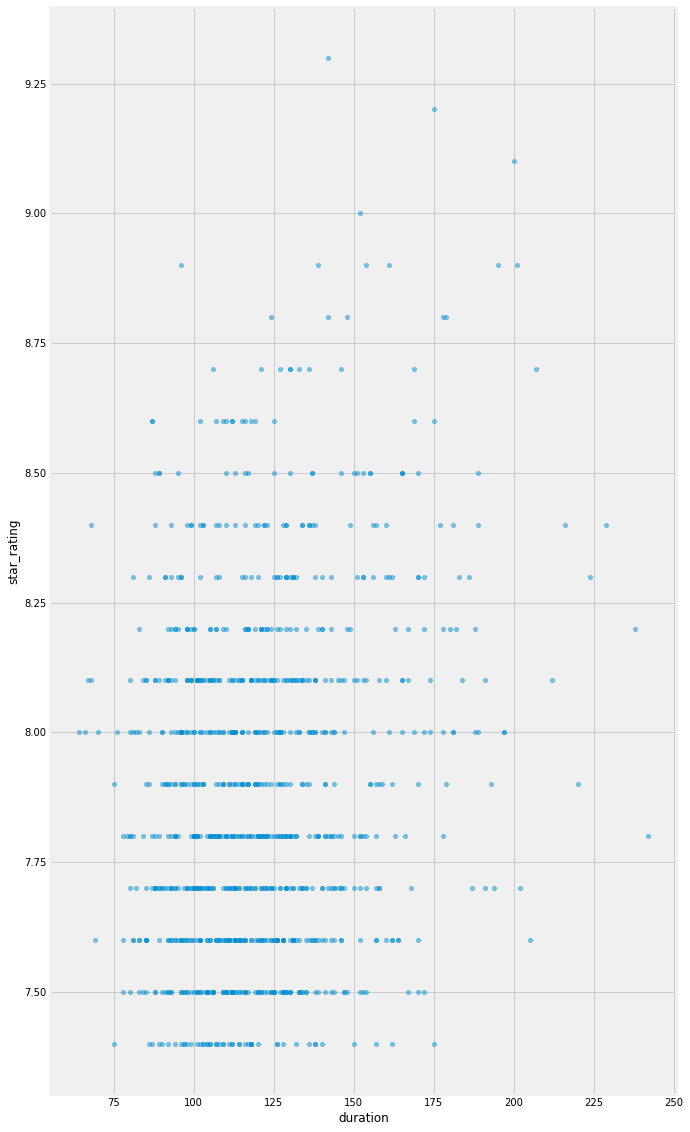

In [18]:
# Answer:
axes= movies.loc[:, ['duration','star_rating']].plot(kind='scatter', x='duration', y='star_rating', alpha=.5,figsize=(10,20))

The scatter plot seems to show that the movie with the highest star rating is almost 2.5 hours in length. There is only one movie less than 2 hours long that got a rating of 8.75 or higher. It seems it is hard for a shorter movie to be good enough to get a star rating higher than 8.5, and comparatively easier for a long movie to get any rang of scores. A movie

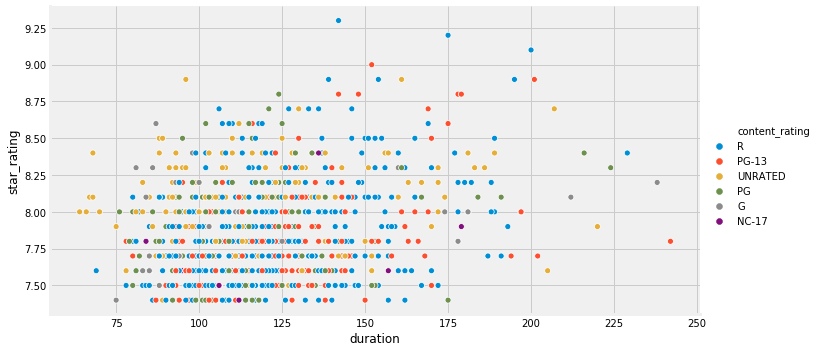

In [312]:
#This one was just for fun, I was trying to figure out what I could do with seaborn and it looks nice, so I included it.
g=sns.relplot(x="duration", y="star_rating", hue='content_rating', aspect=2,data=movies)

#### Calculate the average duration for each genre.

In [116]:
# Answer:
movies.groupby('genre').duration.mean()

genre
Action       126.485294
Adventure    134.840000
Animation     96.596774
Biography    131.844156
Comedy       107.602564
Crime        122.298387
Drama        126.539568
Family       107.500000
Fantasy      112.000000
Film-Noir     97.333333
History       66.000000
Horror       102.517241
Mystery      115.625000
Sci-Fi       109.000000
Thriller     114.200000
Western      136.666667
Name: duration, dtype: float64

## Advanced level

#### Visualize the relationship between content rating and duration.

In [149]:
# Answer:
#I tried a basic line plot and it was not meaningful and I couldn't tell much from a histogram. I like this
#option using seaborn because you can see that we are dealing with a lot of movies and you have
#the option to add hue, either to add a third dimension or to highlight an existing one. We can see here, the
#darker the dot, the longer the movie.

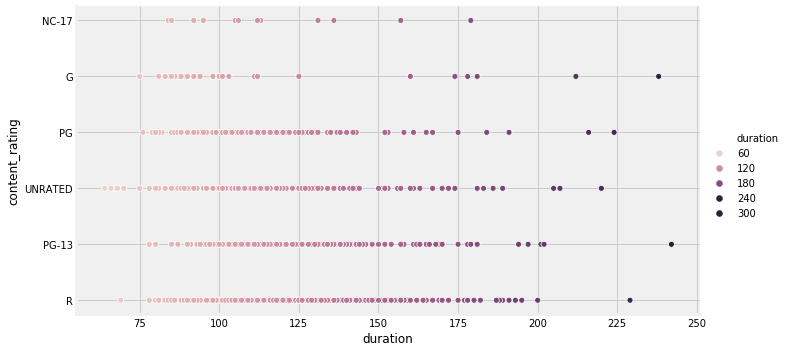

In [153]:
sns.relplot(x="duration", y="content_rating", hue='duration',data=movies, aspect=2, row_order=['G','PG','PG-13','NC-17','R','UNRATED']);

G rated movies (probably "kids movies") tend to be shorter in duration, looking at this graph would make me want to check the one G-rated movie that's more than 225 minutes long. The plot above is only using the altered content ratings list. Below uses the original data.

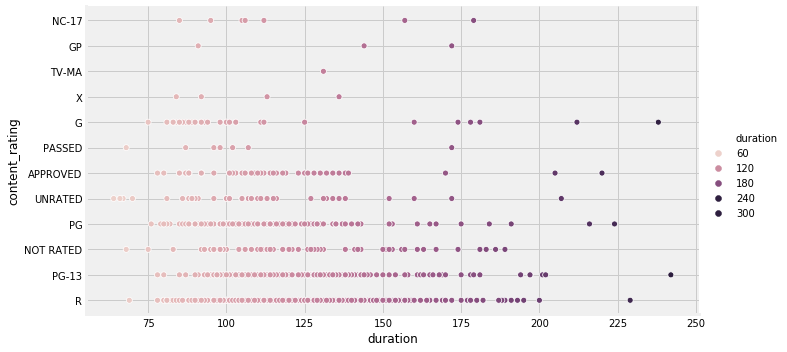

In [183]:
movies2 = pd.read_csv('./data/imdb_1000.csv')
sns.relplot(x="duration", y="content_rating", hue='duration',data=movies2, aspect=2, row_order=['G','PG','PG-13','NC-17','R','UNRATED']);

#### Find the title of the movie with the highest star rating in each genre

In [207]:
#Answer:It was hard to find the right order to put these arguments in, I had kept trying to do this
#with star_rating.max() and then trying to get the title based on that. I had to do quite a bit of reading
#before I found out .first() even existed.
movies.sort_values('star_rating', ascending=False).groupby('genre').title.first()

genre
Action                                     The Dark Knight
Adventure    The Lord of the Rings: The Return of the King
Animation                                    Spirited Away
Biography                                 Schindler's List
Comedy                                        Modern Times
Crime                             The Shawshank Redemption
Drama                                         12 Angry Men
Family                          E.T. the Extra-Terrestrial
Fantasy                          The City of Lost Children
Film-Noir                                    The Third Man
History                                Battleship Potemkin
Horror                                              Psycho
Mystery                                        Rear Window
Sci-Fi                                        Blade Runner
Thriller                                 Shadow of a Doubt
Western                     The Good, the Bad and the Ugly
Name: title, dtype: object

Before I figured out the solution above, I had got tired at one point of trying to figure out the short way
and discovered this code below works, but it's extremely tedious and you have to do a lot of work on your own, without help from the code.  I made it through three genres before I went back to trying to making it work with less lines of code.

In [208]:
Action = title_search.iloc[0:135,:]
print(Action.sort_values(by='star_rating', ascending=False).head(1))
Adventure =title_search.iloc[136:211,:]
print(Adventure.sort_values(by='star_rating',ascending=False).head(1))
Animation =title_search.iloc[212:274,:]
print(Animation.sort_values(by='star_rating',ascending=False).head(1))

                 star_rating content_rating   genre  duration  \
title                                                           
The Dark Knight          9.0          PG-13  Action       152   

                                                       actors_list  
title                                                               
The Dark Knight  [u'Christian Bale', u'Heath Ledger', u'Aaron E...  
                                               star_rating content_rating  \
title                                                                       
The Lord of the Rings: The Return of the King          8.9          PG-13   

                                                   genre  duration  \
title                                                                
The Lord of the Rings: The Return of the King  Adventure       201   

                                                                                     actors_list  
title                                                  

#### Check if there are multiple movies with the same title, and if so, determine if they are actually duplicates.

In [67]:
# Answer:
#The movies appear to be a different rendition of the same story. 
#I have checked IMDB and confirmed each movie is unique.
#i used keep=False because otherwise it would not return all values. I changed the index to actors list
#to make it easier for me to read, it was cutting it off when it was a column.
duplicates = movies[movies.duplicated(subset='title', keep=False)]
duplicates.set_index('actors_list')


,star_rating,title,content_rating,genre,duration
actors_list,,,,,
"[u'Daniel Craig', u'Rooney Mara', u'Christopher Plummer']",7.9,The Girl with the Dragon Tattoo,R,Crime,158
"[u'Michael Nyqvist', u'Noomi Rapace', u'Ewa Fr\xf6ling']",7.8,The Girl with the Dragon Tattoo,R,Crime,152
"[u'Jeff Bridges', u'Matt Damon', u'Hailee Steinfeld']",7.7,True Grit,PG-13,Adventure,110
"[u'Hugh Jackman', u'Russell Crowe', u'Anne Hathaway']",7.7,Les Miserables,PG-13,Drama,158
"[u'Bela Lugosi', u'Helen Chandler', u'David Manners']",7.6,Dracula,UNRATED,Horror,85
"[u'Gary Oldman', u'Winona Ryder', u'Anthony Hopkins']",7.5,Dracula,R,Horror,128
"[u'Liam Neeson', u'Geoffrey Rush', u'Uma Thurman']",7.5,Les Miserables,PG-13,Crime,134
"[u'John Wayne', u'Kim Darby', u'Glen Campbell']",7.4,True Grit,PG-13,Adventure,128


#### Calculate the average star rating for each genre, but only include genres with at least 10 movies


**You only need to choose one of the options below.** However, solving for multiple options would count as "extra credit" that could e.g. raise your score from a 2 ("meets expectations") to a 3 ("exceeds expectations").

#### Option 1: manually create a list of relevant genres, then filter using that list

In [235]:
# Answer: 
genres_to_include = ['Drama', 'Comedy','Action','Crime','Biography','Adventure','Animation','Horror','Mystery']
#genres not to include: ['Western','Sci-Fi','Thriller','Film-Noir','Family','Fantasy','History']
movies[movies.genre.isin(genres_to_include)].groupby('genre').star_rating.mean()


genre
Action       7.884559
Adventure    7.933333
Animation    7.914516
Biography    7.862338
Comedy       7.822436
Crime        7.916935
Drama        7.902518
Horror       7.806897
Mystery      7.975000
Name: star_rating, dtype: float64

#### Option 2: automatically create a list of relevant genres by saving the value_counts and then filtering

#### Option 3: calculate the average star rating for all genres, then filter using a boolean Series

In [304]:
# Answer:

    

#### Option 4: aggregate by count and mean, then filter using the count

In [250]:
# Answer:


## Bonus

#### Figure out something "interesting" using the actors data!

In [261]:
movies.actors_list.mode()

0    [u'Daniel Radcliffe', u'Emma Watson', u'Rupert...
dtype: object

In [276]:
actors = movies.set_index('actors_list').sort_values(by='star_rating', ascending=False)

In [287]:
actors.head(10)

,star_rating,title,content_rating,genre,duration
actors_list,,,,,
"[u'Tim Robbins', u'Morgan Freeman', u'Bob Gunton']",9.3,The Shawshank Redemption,R,Crime,142
"[u'Marlon Brando', u'Al Pacino', u'James Caan']",9.2,The Godfather,R,Crime,175
"[u'Al Pacino', u'Robert De Niro', u'Robert Duvall']",9.1,The Godfather: Part II,R,Crime,200
"[u'Christian Bale', u'Heath Ledger', u'Aaron Eckhart']",9.0,The Dark Knight,PG-13,Action,152
"[u'John Travolta', u'Uma Thurman', u'Samuel L. Jackson']",8.9,Pulp Fiction,R,Crime,154
"[u'Henry Fonda', u'Lee J. Cobb', u'Martin Balsam']",8.9,12 Angry Men,UNRATED,Drama,96
"[u'Clint Eastwood', u'Eli Wallach', u'Lee Van Cleef']",8.9,"The Good, the Bad and the Ugly",UNRATED,Western,161
"[u'Elijah Wood', u'Viggo Mortensen', u'Ian McKellen']",8.9,The Lord of the Rings: The Return of the King,PG-13,Adventure,201
"[u'Liam Neeson', u'Ralph Fiennes', u'Ben Kingsley']",8.9,Schindler's List,R,Biography,195


In [286]:
actors.tail(10)

,star_rating,title,content_rating,genre,duration
actors_list,,,,,
"[u'Jack Nicholson', u'Morgan Freeman', u'Sean Hayes']",7.4,The Bucket List,PG-13,Adventure,97
"[u'Shirley MacLaine', u'Debra Winger', u'Jack Nicholson']",7.4,Terms of Endearment,R,Comedy,132
"[u'Michael Shannon', u'Jessica Chastain', u'Shea Whigham']",7.4,Take Shelter,R,Drama,120
"[u'Julianne Moore', u'Dennis Quaid', u'Dennis Haysbert']",7.4,Far from Heaven,PG-13,Drama,107
"[u'Jack Nance', u'Charlotte Stewart', u'Allen Joseph']",7.4,Eraserhead,UNRATED,Drama,89
"[u'Greta Gerwig', u'Mickey Sumner', u'Adam Driver']",7.4,Frances Ha,R,Comedy,86
"[u'Macaulay Culkin', u'Joe Pesci', u'Daniel Stern']",7.4,Home Alone,PG,Comedy,103
"[u'Jennifer Tilly', u'Gina Gershon', u'Joe Pantoliano']",7.4,Bound,R,Crime,108
"[u'Johnny Depp', u'Christina Ricci', u'Miranda Richardson']",7.4,Sleepy Hollow,R,Drama,105
